<a href="https://colab.research.google.com/github/Nassima-el-jazouli/JPX-Tokyo-Stock-Exchange-Prediction/blob/master/JPX_Tokyo_Stock_Exchange_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *`Cette partie concerne la connexion entre google colab et la compétition. Le téléchargement de kaggle.json pour importer les données en moins de 5 minutes et l'allocation de 0.5 Go au lieu de 1.28 Go.`*


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nasmaelja","key":"e3f28c40ca303bd4fb783abc3f834545"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           9301       1268  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           1509         58  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6190        159  1.0              
muratkokludataset/acoustic-extinguisher-fire-

In [ ]:
! kaggle competitions download -c jpx-tokyo-stock-exchange-prediction

 95% 222M/233M [00:02<00:00, 85.9MB/s]
100% 233M/233M [00:02<00:00, 102MB/s] 


In [ ]:
! unzip jpx-tokyo-stock-exchange-prediction.zip

Archive:  jpx-tokyo-stock-exchange-prediction.zip
  inflating: data_specifications/options_spec.csv  
  inflating: data_specifications/stock_fin_spec.csv  
  inflating: data_specifications/stock_list_spec.csv  
  inflating: data_specifications/stock_price_spec.csv  
  inflating: data_specifications/trades_spec.csv  
  inflating: example_test_files/financials.csv  
  inflating: example_test_files/options.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/secondary_stock_prices.csv  
  inflating: example_test_files/stock_prices.csv  
  inflating: example_test_files/trades.csv  
  inflating: jpx_tokyo_market_prediction/__init__.py  
  inflating: jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: stock_list.csv          
  inflating: supplemental_files/financials.csv  
  inflating: supplemental_files/options.csv  
  inflating: supplemental_files/secondary_stock_prices.csv  
  inflating: supplemental_files/stock_

### *`L'importation des bibliothèques dont on a besoin :`*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### *`Les données sur lesquelles on travaille sont de type timeseries, qui sont mis à jour pendant cette compétition 3 fois, la première c'était au début mai, la deuxième ça sera au début juin et la troisième, ça sera une semaine avant la fin de la compétition.`*

In [ ]:
url = '/content/train_files/stock_prices.csv'
url1 = '/content/supplemental_files/stock_prices.csv'
dataset = pd.read_csv(url)
dataset_supp = pd.read_csv(url1)
df = pd.concat([dataset, dataset_supp])

In [ ]:
df.drop_duplicates(['Date','SecuritiesCode'],keep='first',inplace=True)

In [ ]:
df

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
195988,20220428_9990,2022-04-28,9990,497.0,504.0,494.0,504.0,51900,1.0,NaN,False,0.024048
195989,20220428_9991,2022-04-28,9991,776.0,786.0,774.0,784.0,23400,1.0,NaN,False,0.011378
195990,20220428_9993,2022-04-28,9993,1520.0,1530.0,1510.0,1517.0,8100,1.0,NaN,False,-0.005941
195991,20220428_9994,2022-04-28,9994,2471.0,2489.0,2457.0,2485.0,7800,1.0,NaN,False,0.005602


In [ ]:
df.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,2.528524e+06,2.520325e+06,2.520325e+06,2.520325e+06,2.520325e+06,2.528524e+06,2.528524e+06,20821.000000,2.528282e+06
mean,5.893926e+03,2.596964e+03,2.629022e+03,2.563411e+03,2.596341e+03,6.866332e+05,1.000464e+00,23.019841,3.689221e-04
std,2.403049e+03,3.624991e+03,3.667853e+03,3.579982e+03,3.623962e+03,3.819717e+06,6.506888e-02,33.240956,2.343145e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,0.000000e+00,1.000000e-01,0.000000,-5.785414e-01
25%,3.891000e+03,1.021000e+03,1.034000e+03,1.008000e+03,1.021000e+03,3.050000e+04,1.000000e+00,5.500000,-1.062888e-02
50%,6.237000e+03,1.810000e+03,1.832000e+03,1.788000e+03,1.809500e+03,1.064000e+05,1.000000e+00,15.000000,0.000000e+00
75%,7.962000e+03,3.020000e+03,3.060000e+03,2.987000e+03,3.020000e+03,4.003000e+05,1.000000e+00,30.000000,1.056052e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,2.000000e+01,1080.000000,1.119512e+00


### *`On essaye de connaitre le nombre des valeurs nulles dans cette dataset.`*

In [ ]:
df.isnull().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   8199
High                   8199
Low                    8199
Close                  8199
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2507703
SupervisionFlag           0
Target                  242
dtype: int64

### *`On constate qu'il y a des valeurs nulles au niveau de Open, High, Low, Close, Target qu'on va les remédier en les remplaçant avec la moyenne de chaque feature d'entre eux. Par contre, la propriété ExpectedDividend, qui signifie le taux de profit, on va remplacer ses valeurs nulles par des zéros.`*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528524 entries, 0 to 195992
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 233.9+ MB


In [ ]:
df = df.drop(['RowId'], axis = 1)

In [ ]:
df = df[df['SupervisionFlag'] == False]

In [ ]:
df = df.drop(['SupervisionFlag'], axis = 1)

In [ ]:
df['ExpectedDividend'] = df['ExpectedDividend'].replace(np.nan, 0)

In [ ]:
df['Open'] = df['Open'].replace(np.nan, df['Open'].mean())

In [ ]:
df['Close'] = df['Close'].replace(np.nan, df['Close'].mean())

In [ ]:
df['High'] = df['High'].replace(np.nan, df['High'].mean())

In [ ]:
df['Low'] = df['Low'].replace(np.nan, df['Low'].mean())

In [ ]:
df['Target'] = df['Target'].replace(np.nan, df['Target'].mean())

In [ ]:
df

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.0,0.000730
1,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,0.0,0.012324
2,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,0.0,0.006154
3,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,0.0,0.011053
4,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,0.0,0.003026
...,...,...,...,...,...,...,...,...,...,...
195988,2022-04-28,9990,497.0,504.0,494.0,504.0,51900,1.0,0.0,0.024048
195989,2022-04-28,9991,776.0,786.0,774.0,784.0,23400,1.0,0.0,0.011378
195990,2022-04-28,9993,1520.0,1530.0,1510.0,1517.0,8100,1.0,0.0,-0.005941
195991,2022-04-28,9994,2471.0,2489.0,2457.0,2485.0,7800,1.0,0.0,0.005602


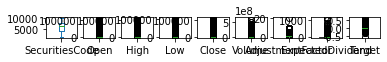

<Figure size 1440x1440 with 0 Axes>

In [ ]:
df.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False)
plt.figure(figsize=(20, 20))
plt.show()

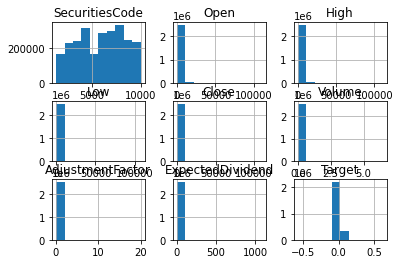

<Figure size 1440x1440 with 0 Axes>

In [ ]:
df.hist()
plt.figure(figsize=(20, 20))
plt.show()

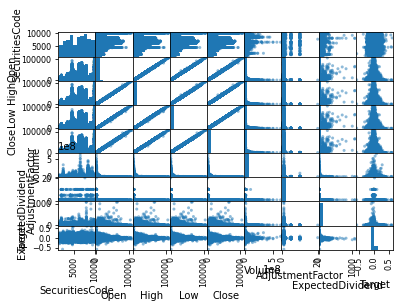

In [ ]:
scatter_matrix(df)
plt.show()

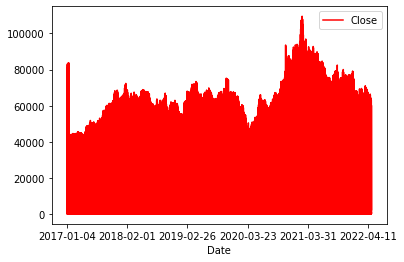

In [ ]:
#  Plotting date vs the close market stock price
df.plot('Date','Close',color="red")
plt.show()

### *`Comme vous remarquez, pendant la période du confinement au Japan, les actions ont subi une grande diminution dans leurs prix (généralement il y a des secteurs qui ont connu des grandes pertes et d'autres qui ont connu un succès incontournable), dans notre cas on va supprimer les enregistrements de 01-03-2020 jusqu'à 01-09-2020 afin de ne pas affecter les résultats finaux.`*

In [ ]:
df = df.loc[(df['Date'] < '2020-03-01') | (df['Date'] > '2020-09-01')]

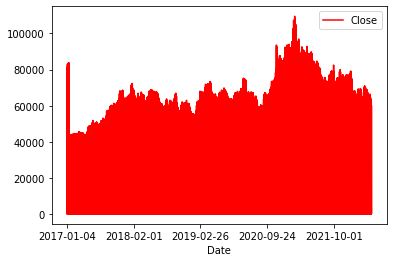

In [ ]:
#  Plotting date vs the close market stock price
df.plot('Date','Close',color="red")
plt.show()

### *`Afin d'éviter les problèmes par la suite, on va procéder par convertir notre feature Date en datetime puis en int :`*

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime("%Y%m%d").astype(int)

### *`Dans cette première approche, on veut utiliser la regression linéaire afin de prédire notre target, pour cela, on va essayer de déduire les valeurs les plus corrélés afin de mieux sélectionner les features qu'on va les utiliser dans notre modèle et supprimer ceux dont on n'aura pas besoin :`*

In [ ]:
from sklearn.linear_model import LinearRegression

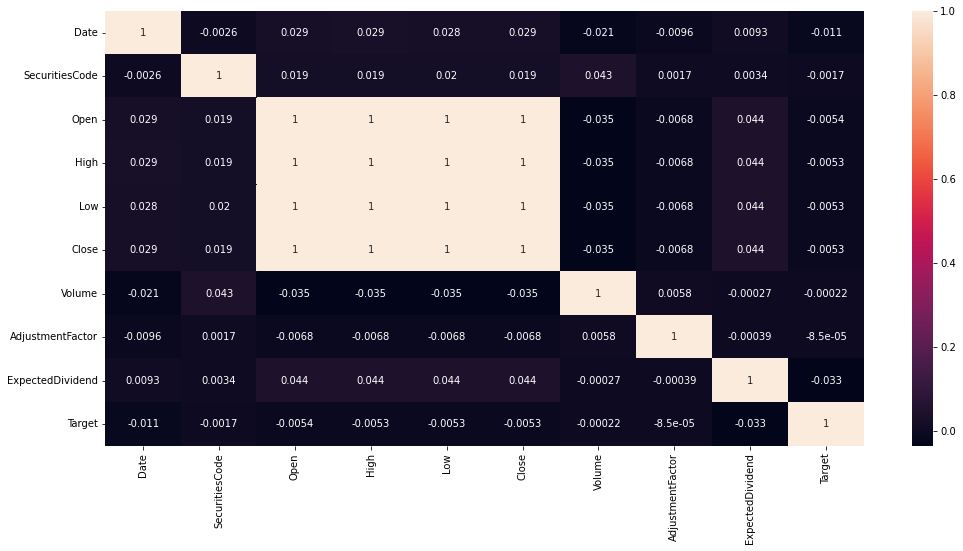

In [ ]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

### *`On constate que les features Open, High, Low et Close sont corrélés entre eux, d'où la suppression des features qui nous donnent les memes informations, on va procéder par supprimer les features Open, High et Low et garder juste Close et voir ce que le modèle qu'on va adopter va produire par la suite :`*

In [ ]:
df = df.drop(['Open'], axis = 1)
df = df.drop(['High'], axis = 1)
df = df.drop(['Low'], axis = 1)
df

,Date,SecuritiesCode,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
0,20170104,1301,2742.0,31400,1.0,0.0,0.000730
1,20170104,1332,571.0,2798500,1.0,0.0,0.012324
2,20170104,1333,3210.0,270800,1.0,0.0,0.006154
3,20170104,1376,1550.0,11300,1.0,0.0,0.011053
4,20170104,1377,3330.0,150800,1.0,0.0,0.003026
...,...,...,...,...,...,...,...
195988,20220428,9990,504.0,51900,1.0,0.0,0.024048
195989,20220428,9991,784.0,23400,1.0,0.0,0.011378
195990,20220428,9993,1517.0,8100,1.0,0.0,-0.005941
195991,20220428,9994,2485.0,7800,1.0,0.0,0.005602


### *`La remarque est bien claire que les features Close et Volume ont des valeurs grandes tant que les valeurs de la feature Target par exemple est très petite, pour cela, on va normaliser nos données en utilisant la méthode MinMaxScaler() :`*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
print(scaler.fit(df))
MinMaxScaler(copy=True, feature_range=(0, 1))
print(scaler.data_max_)
print(scaler.transform(df))

MinMaxScaler()
[2.02204280e+07 9.99700000e+03 1.09550000e+05 6.43654000e+08
 2.00000000e+01 1.08000000e+03 6.18238022e-01]
[[0.         0.         0.02490505 ... 0.04522613 0.         0.48402557]
 [0.         0.00356486 0.00508509 ... 0.04522613 0.         0.49371281]
 [0.         0.00367985 0.02917762 ... 0.04522613 0.         0.48855722]
 ...
 [1.         0.99954002 0.01372152 ... 0.04522613 0.         0.4784514 ]
 [1.         0.99965501 0.02255879 ... 0.04522613 0.         0.48809632]
 [1.         1.         0.00654579 ... 0.04522613 0.         0.47198463]]


### *`On passe maintenant pour diviser notre data en train et test afin d'appliquer notre modèle.`*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = ['SecuritiesCode', 'Close', 'Volume', 'AdjustmentFactor']

In [ ]:
X = df[features]
Y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### *`Passant maintenant à l'entrainement de notre modèle en utilisant la régression linéaire :`*

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### *`Prédictions les valeurs de notre target :`*

In [ ]:
y_pred = lm.predict(X_test)
df_ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df_1 = df_.head(25)
print(df_1)

           Actual  Predicted
767188   0.003856   0.000322
860393   0.017790   0.000346
2185396 -0.016626   0.000308
1379402  0.000000   0.000272
691183  -0.033099   0.000165
417760   0.032662   0.000242
309873  -0.004467   0.000310
850015   0.004145   0.000237
741869  -0.037037   0.000363
142676   0.026128   0.000241
126475  -0.004049   0.000266
428470   0.013744   0.000294
419678   0.000000   0.000256
43796   -0.010471   0.000152
1286034 -0.005038   0.000176
1222098 -0.025758   0.000389
134586   0.005299   0.000316
281650   0.026362   0.000295
274545   0.011673   0.000271
79769    0.006728   0.000268
2146802  0.008785   0.000291
1775726  0.020378   0.000258
146996  -0.021053   0.000303
554238  -0.004573   0.000214
2062885 -0.021579   0.000336


### *`Calculant le score de notre modèle :`*

In [ ]:
lm.score(X_test,y_test)

2.7521391326001954e-05

In [ ]:
from sklearn import metrics

### *`Utilisant les mesures de performances pour évaluer notre modèle (MAE, MSE, RMSE) :`*

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.014789498980545913
Mean Squared Error: 0.0004904753013745926
Root Mean Squared Error: 0.022146676982667007
